# Decision Tree_class_sudhanshu 
Practical implementation on multi-Classification problem

###  Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
## total no. of classes are 6
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
## check duplicated values
df.duplicated().sum()

240

### Seperate independent and dependent features

In [6]:
x = df.iloc[:,:-1]
y = df['quality']

### Train test split

In [7]:
X_train , X_test, y_train  , y_test = train_test_split(x,y,test_size=0.25,random_state=300)

In [8]:
X_train.shape,y_train.shape

((1199, 11), (1199,))

In [9]:
X_test.shape,y_test.shape

((400, 11), (400,))

### Model Building on train dataset

In [10]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

### Plot Decision tree

[Text(0.5005468385440971, 0.98, 'X[10] <= 10.15\ngini = 0.638\nsamples = 1199\nvalue = [5, 41, 512, 487, 139, 15]'),
 Text(0.26775767032197856, 0.94, 'X[1] <= 0.548\ngini = 0.506\nsamples = 594\nvalue = [3, 20, 374, 184, 12, 1]'),
 Text(0.1533481101259916, 0.9, 'X[6] <= 60.5\ngini = 0.554\nsamples = 264\nvalue = [0, 7, 134, 114, 8, 1]'),
 Text(0.07337844143723751, 0.86, 'X[9] <= 0.585\ngini = 0.56\nsamples = 178\nvalue = [0, 5, 68, 96, 8, 1]'),
 Text(0.03546430237984134, 0.82, 'X[5] <= 8.5\ngini = 0.528\nsamples = 55\nvalue = [0, 4, 33, 18, 0, 0]'),
 Text(0.018665422305179653, 0.78, 'X[10] <= 9.85\ngini = 0.265\nsamples = 20\nvalue = [0, 1, 17, 2, 0, 0]'),
 Text(0.011199253383107793, 0.74, 'X[9] <= 0.435\ngini = 0.105\nsamples = 18\nvalue = [0, 0, 17, 1, 0, 0]'),
 Text(0.007466168922071862, 0.7, 'X[8] <= 3.14\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1, 0, 0]'),
 Text(0.003733084461035931, 0.66, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.011199253383107793, 0.66,

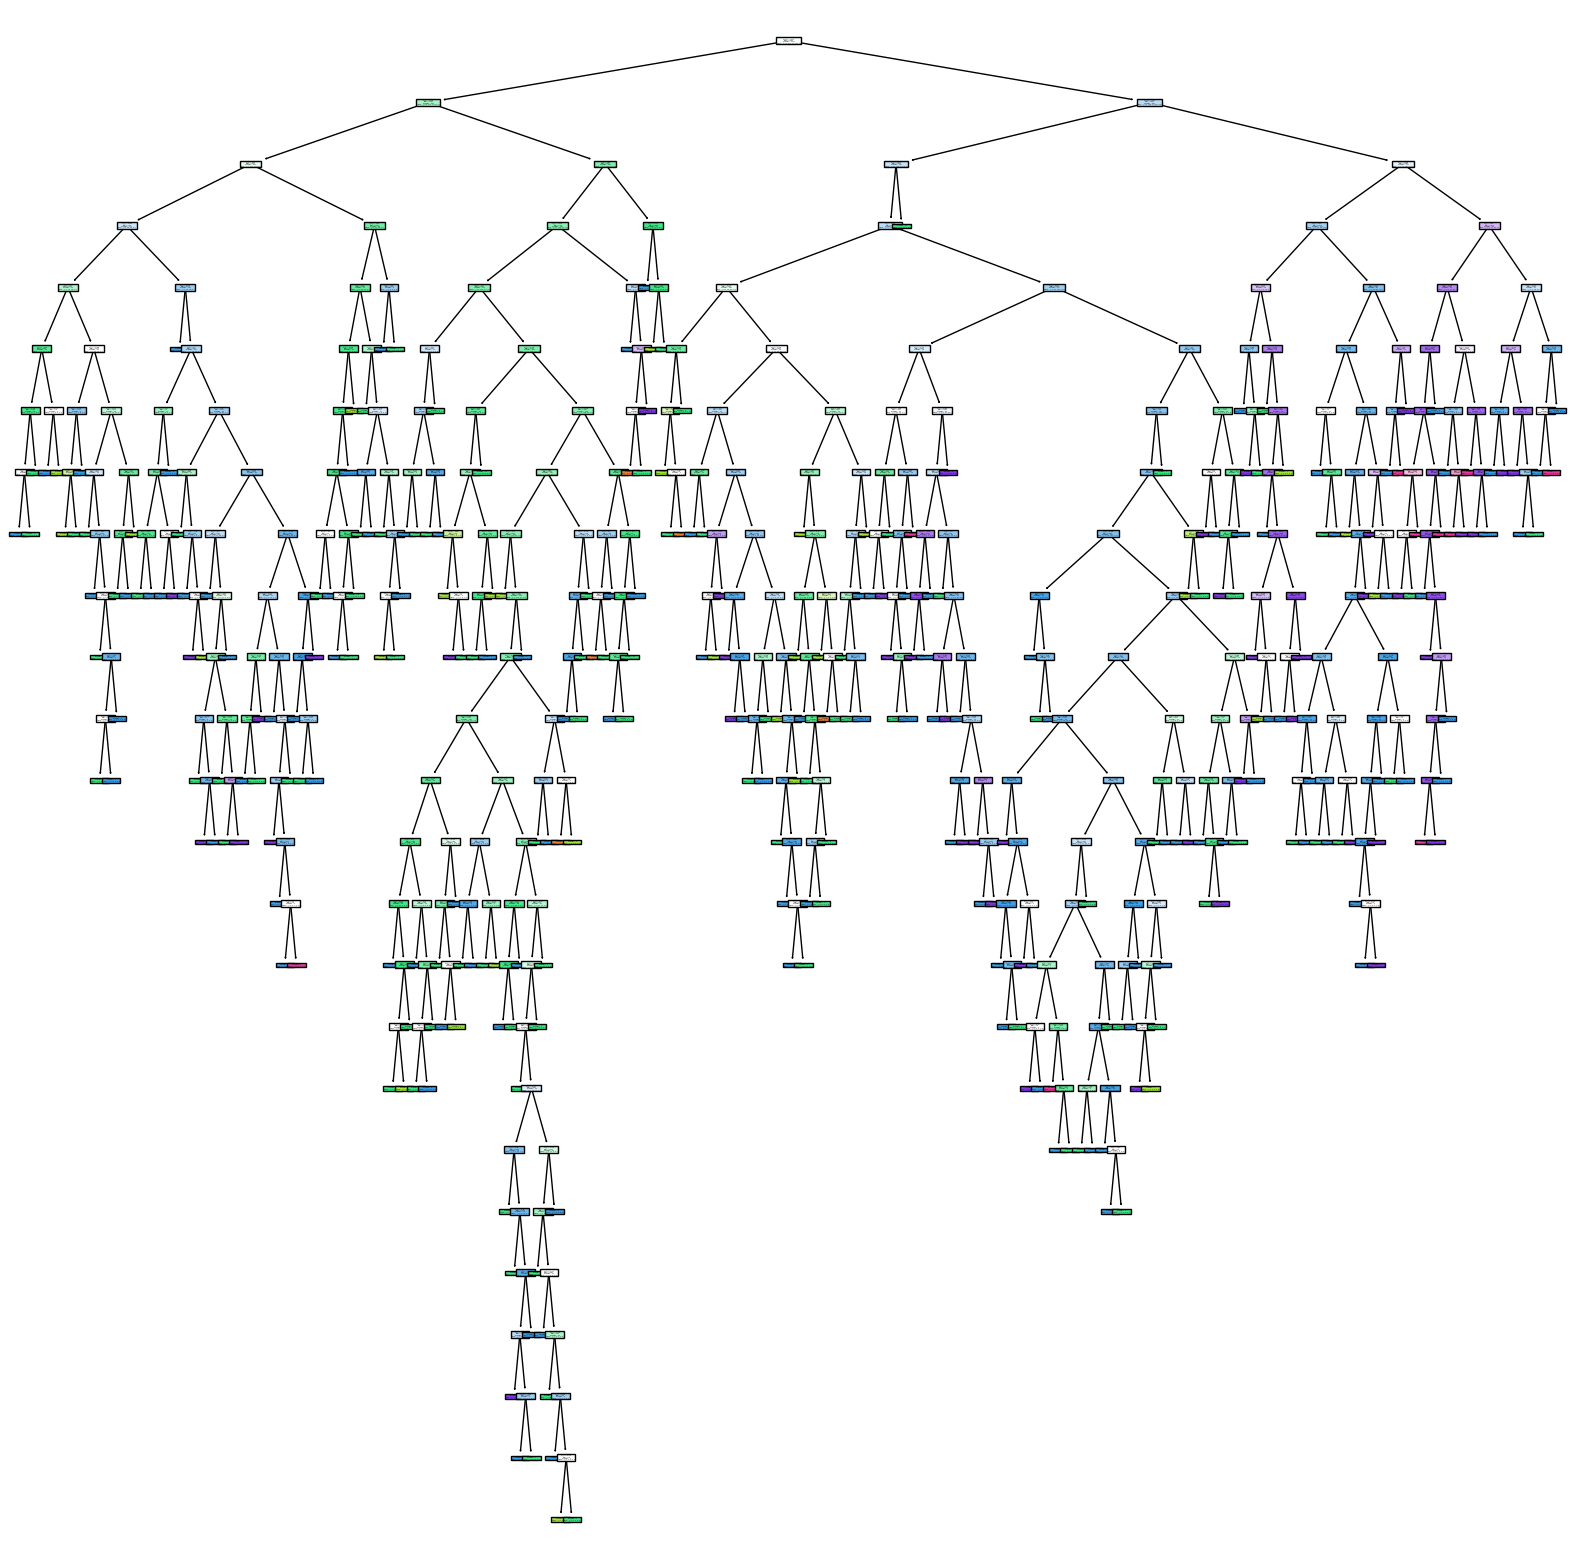

In [12]:
fig1 = plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled = True)

### Take small sample of dataset to understand decision tree

In [22]:
df1 = df.head(30)

In [23]:
x1 = df1.drop(columns='quality')
y1 = df1['quality']

In [24]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

[Text(0.5909090909090909, 0.9166666666666666, 'citric acid <= 0.42\ngini = 0.471\nsamples = 30\nvalue = [1, 21, 5, 3]\nclass = 5'),
 Text(0.36363636363636365, 0.75, 'total sulfur dioxide <= 22.0\ngini = 0.334\nsamples = 26\nvalue = [1, 21, 2, 2]\nclass = 5'),
 Text(0.18181818181818182, 0.5833333333333334, 'sulphates <= 0.58\ngini = 0.625\nsamples = 4\nvalue = [0, 1, 1, 2]\nclass = 7'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]\nclass = 7'),
 Text(0.2727272727272727, 0.4166666666666667, 'chlorides <= 0.081\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0]\nclass = 5'),
 Text(0.18181818181818182, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]\nclass = 5'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]\nclass = 6'),
 Text(0.5454545454545454, 0.5833333333333334, 'free sulfur dioxide <= 7.5\ngini = 0.169\nsamples = 22\nvalue = [1, 20, 1, 0]\nclass = 5'),
 Text(0.45454545454545453, 0.4166666666666667, 'g

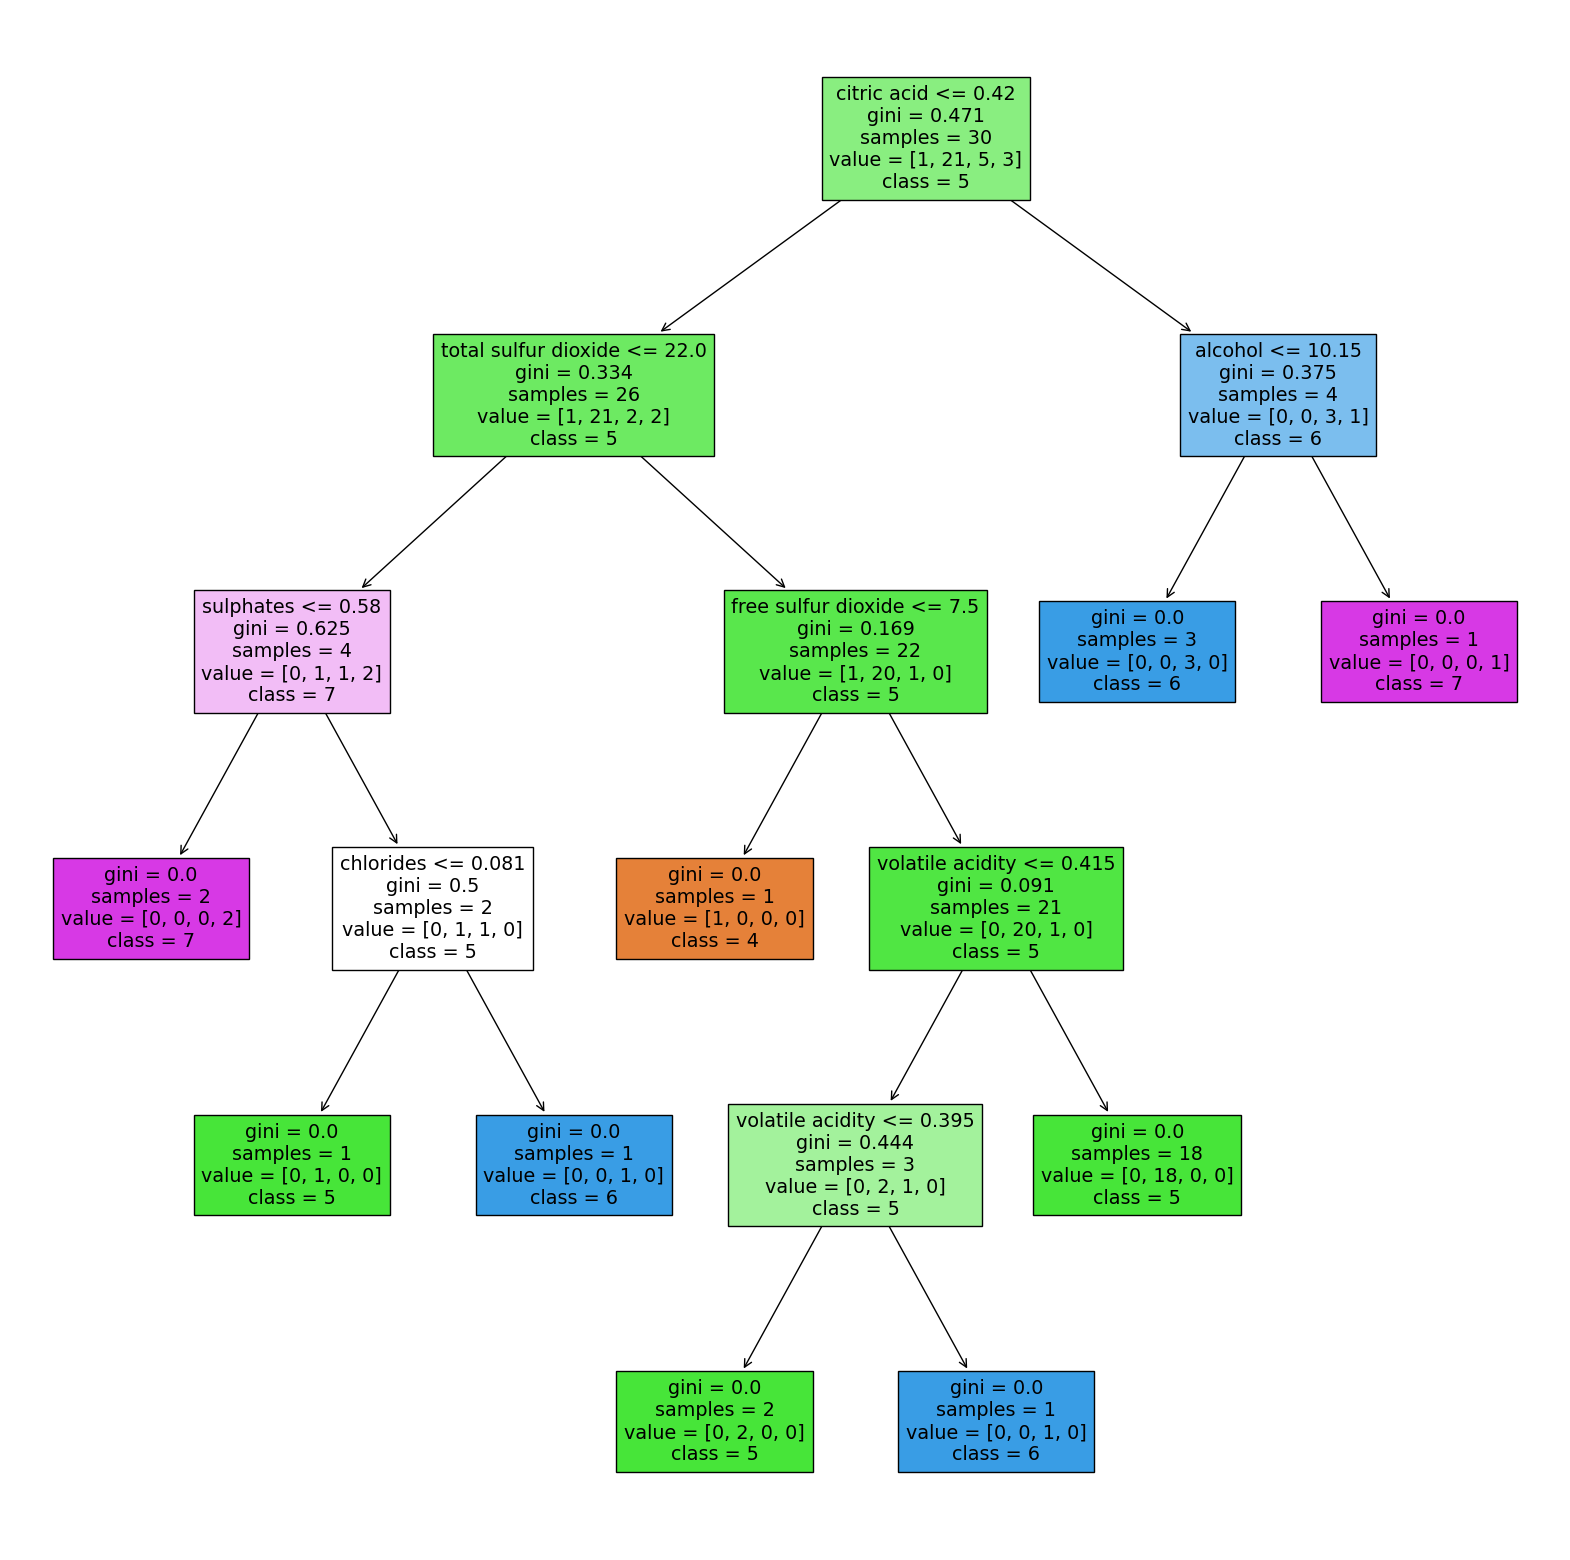

In [16]:
fig = plt.figure(figsize=(20,20))
tree.plot_tree(dt_model1,filled = True, feature_names= x1.columns,class_names= [str(i) for i in set(y1)])

- Now we can see the decision tree values </br>
Here if we see the root node it has the following values</br>
X[2] <= 0.42 </br>
gini = 0.471 </br>
sample = 30 </br>
value = [1,21,5,3] </br>

- `X[2] <= 0.42`    
        - ( X[2] means 3rd columns in X dataset will become root node )</br>
        - Tree has check gini impurities for all columns and find that 3rd column has the lower gini impurity and made it as root node</br>
        - so X[2] <= 0.42 means what ever data is in X[2] columns if it is less then 0.42, it will go on left side and >0.42 will go on right side</br>

- `gini = 0.471`  (gini impurities)  
- `sample = 30` (means we have taken 30 samples of y1 data)
- `value = [1,21,5,3]` (y1 data has 4 classes 4,5,6,7)


In [14]:
y1.value_counts()

5    21
6     5
7     3
4     1
Name: quality, dtype: int64

In [15]:
x1[x1['citric acid'] >=0.42]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08,9.2
20,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.9968,3.39,0.53,9.4


#### save the decision tree

In [68]:
fig.savefig("dt_model1.png")

In [17]:
fig1.savefig("dt_model_big")

### Train and test Accuracy  using decision tree classifier

In [25]:
sample_model_pre = dt_model1.predict(x1)
sample_model_pre

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6], dtype=int64)

In [26]:
## Train data accuracy
dt_model1.score(x1,y1)

1.0

In [27]:
## Test data accuracy
dt_model1.score(X_test,y_test)

0.38

-  We have made overfitted mode

### Pruning
We are performing prunning that means removing some of the branches so that the we can reduce the difference between the score of train data and test data

In [28]:
path = dt_model1.cost_complexity_pruning_path(x1,y1)  ## we have used original data that we have at the time of taining the model
path

{'ccp_alphas': array([0.        , 0.03174603, 0.03333333, 0.05      , 0.05      ,
        0.06075036, 0.08216783, 0.13136752]),
 'impurities': array([0.        , 0.06349206, 0.0968254 , 0.1468254 , 0.1968254 ,
        0.25757576, 0.33974359, 0.47111111])}

In [29]:
# Extract ccp_alpha from path
ccp_alpha = path.ccp_alphas
ccp_alpha

array([0.        , 0.03174603, 0.03333333, 0.05      , 0.05      ,
       0.06075036, 0.08216783, 0.13136752])

In [30]:
## Creating decision trees model for all ccp_alphas values
dt_model2 = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_model2.append(dt_m) ## multiple decision tree models are appended in dt_model2

In [31]:
## decision trees model for all ccp_alphas values
dt_model2

## we have build 8 models 

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.03174603174603176),
 DecisionTreeClassifier(ccp_alpha=0.03333333333333333),
 DecisionTreeClassifier(ccp_alpha=0.049999999999999996),
 DecisionTreeClassifier(ccp_alpha=0.05),
 DecisionTreeClassifier(ccp_alpha=0.06075036075036072),
 DecisionTreeClassifier(ccp_alpha=0.08216783216783222),
 DecisionTreeClassifier(ccp_alpha=0.1313675213675214)]

-  now we have to select the model which is lower overfitted one

#### Now we have to select ccp_alpha value where train and test accuray is same

In [32]:
[print(i,"----",i.score(x1,y1)) for i in dt_model2]

DecisionTreeClassifier() ---- 1.0
DecisionTreeClassifier(ccp_alpha=0.03174603174603176) ---- 0.9666666666666667
DecisionTreeClassifier(ccp_alpha=0.03333333333333333) ---- 0.9333333333333333
DecisionTreeClassifier(ccp_alpha=0.049999999999999996) ---- 0.9
DecisionTreeClassifier(ccp_alpha=0.05) ---- 0.8666666666666667
DecisionTreeClassifier(ccp_alpha=0.06075036075036072) ---- 0.8333333333333334
DecisionTreeClassifier(ccp_alpha=0.08216783216783222) ---- 0.8
DecisionTreeClassifier(ccp_alpha=0.1313675213675214) ---- 0.7


[None, None, None, None, None, None, None, None]

In [33]:
train_score = [i.score(x1,y1) for i in dt_model2]
train_score

[1.0,
 0.9666666666666667,
 0.9333333333333333,
 0.9,
 0.8666666666666667,
 0.8333333333333334,
 0.8,
 0.7]

In [34]:
test_score = [i.score(X_test,y_test) for i in dt_model2]
test_score

[0.3975, 0.3825, 0.3975, 0.3725, 0.375, 0.3775, 0.42, 0.4225]

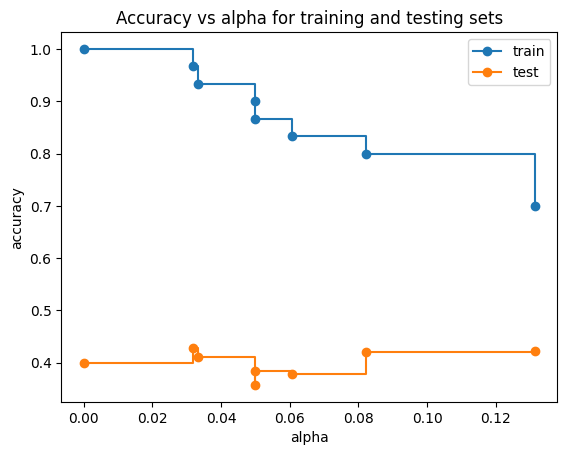

In [28]:
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha,train_score,marker = 'o',label = "train",
        drawstyle = "steps-post")
ax.plot(ccp_alpha,test_score,marker = 'o',label = "test",
        drawstyle = "steps-post")
ax.legend()
plt.show()

- Here we have to reduce the difference between the accuracy of train data and test data 
- for that we have to increase the number of record which we have given to train the model 
- here we have given 30 records so we get the accuracy as shown above 
- Now when we increase record to 500 then we get the accuracy as shown in graph below 

![](https://i.imgur.com/LbfaVAW.png)

### Observation
- when our ccp_alpha value in between 0.024 and 0.03, our model's training and test accuracy is closer to each other
- This is called hyper-parameter tunning manually

### Now build the model again
using ccp_alpha value which we achieved above

In [35]:
df1 = df.head(500)
x1 = df1.drop(columns='quality')
y1 = df1['quality']

In [36]:
dt_model_ccp = DecisionTreeClassifier(random_state=0,ccp_alpha = 0.02)
dt_model_ccp.fit(x1,y1)
# we have tunned only one parameter ccp_alpha

DecisionTreeClassifier(ccp_alpha=0.02, random_state=0)

[Text(0.4, 0.8333333333333334, 'X[10] <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]'),
 Text(0.2, 0.5, 'gini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]'),
 Text(0.6, 0.5, 'X[9] <= 0.545\ngini = 0.657\nsamples = 241\nvalue = [0, 4, 72, 112, 46, 7]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.408\nsamples = 32\nvalue = [0, 2, 24, 5, 1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.638\nsamples = 209\nvalue = [0, 2, 48, 107, 45, 7]')]

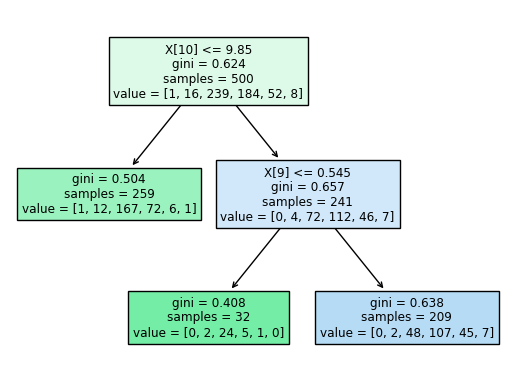

In [31]:
tree.plot_tree(dt_model_ccp,filled = True)

- This model we are getting after tunning ccp_alpha to 0.02

In [37]:
# Accuracy of training model after hyperparameter tuning
dt_model_ccp.score(x1,y1)

0.596

In [38]:
# Accuracy of test data after hyperparameter tunning
dt_model_ccp.score(X_test,y_test)

0.54

- now the accuracy of training data and test data is closer to each other 
- That means we have removed overfitting

### Build new model and check the accuracy using all 1199 training data 

In [41]:
# df1 = df.head(1199)
# x1 = df1.drop(columns='quality')
# y1 = df1['quality']

dt_model_ccp = DecisionTreeClassifier(random_state=0,ccp_alpha = 0.0)
dt_model_ccp.fit(X_train,y_train)
# we have tunned only one parameter ccp_alpha

# Accuracy of training model after hyperparameter tuning
print("Train data accuracy:",dt_model_ccp.score(X_train,y_train))

# Accuracy of test data after hyperparameter tunning
print("Test data accuracy",dt_model_ccp.score(X_test,y_test))

Train data accuracy: 1.0
Test data accuracy 0.6025


In [40]:
## Change ccp_alpha value to 0.02

dt_model_ccp = DecisionTreeClassifier(random_state=0,ccp_alpha = 0.02)
dt_model_ccp.fit(X_train,y_train)
# we have tunned only one parameter ccp_alpha

# Accuracy of training model after hyperparameter tuning
print("Train data accuracy:",dt_model_ccp.score(X_train,y_train))

# Accuracy of test data after hyperparameter tunning
print("Test data accuracy",dt_model_ccp.score(X_test,y_test))

Train data accuracy: 0.5646371976647206
Test data accuracy 0.5475
